In [3]:
!pip install caer canaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 981.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 13.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 15.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 18.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.1.1
    Uninstalling typing_extensions-4.1.1:
      Successfully uninstalled typing_extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.8.0
    Uninstalling h5py-3.8.0:
      Successfully uninstalled h5py-3.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the follo

In [4]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

In [7]:
IMG_SIZE=(80,80)
channels=1
char_path=r"/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset"

In [8]:
#Creating a character dict, sorting it in descending order
char_dict={}
for char in os.listdir(char_path):
    char_dict[char]=len(os.listdir(os.path.join(char_path,char)))
#sort in descending order
char_dict=caer.sort_dict(char_dict,descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [9]:
#Getting first 10  categories with most number of images
characters=[]
count=0
for i in char_dict:
    characters.append(i[0])
    count +=1
    if count>=10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [10]:
#Create the training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)


[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 6.052293062210083s
[INFO] At 1000 files
[INFO] 1454 files found in 1.2437834739685059s
[INFO] At 1000 files
[INFO] 1452 files found in 2.119650363922119s
[INFO] At 1000 files
[INFO] 1354 files found in 0.8462204933166504s
[INFO] At 1000 files
[INFO] 1342 files found in 0.9328184127807617s
[INFO] At 1000 files
[INFO] 1291 files found in 0.7486357688903809s
[INFO] At 1000 files
[INFO] 1206 files found in 0.38954663276672363s
[INFO] At 1000 files
[INFO] 1194 files found in 0.21651005744934082s
[INFO] At 1000 files
[INFO] 1193 files found in 0.2938194274902344s
[INFO] At 1000 files
[INFO] 1079 files found in 0.0036029815673828125s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 3m 16s


In [11]:
len(train)

13811

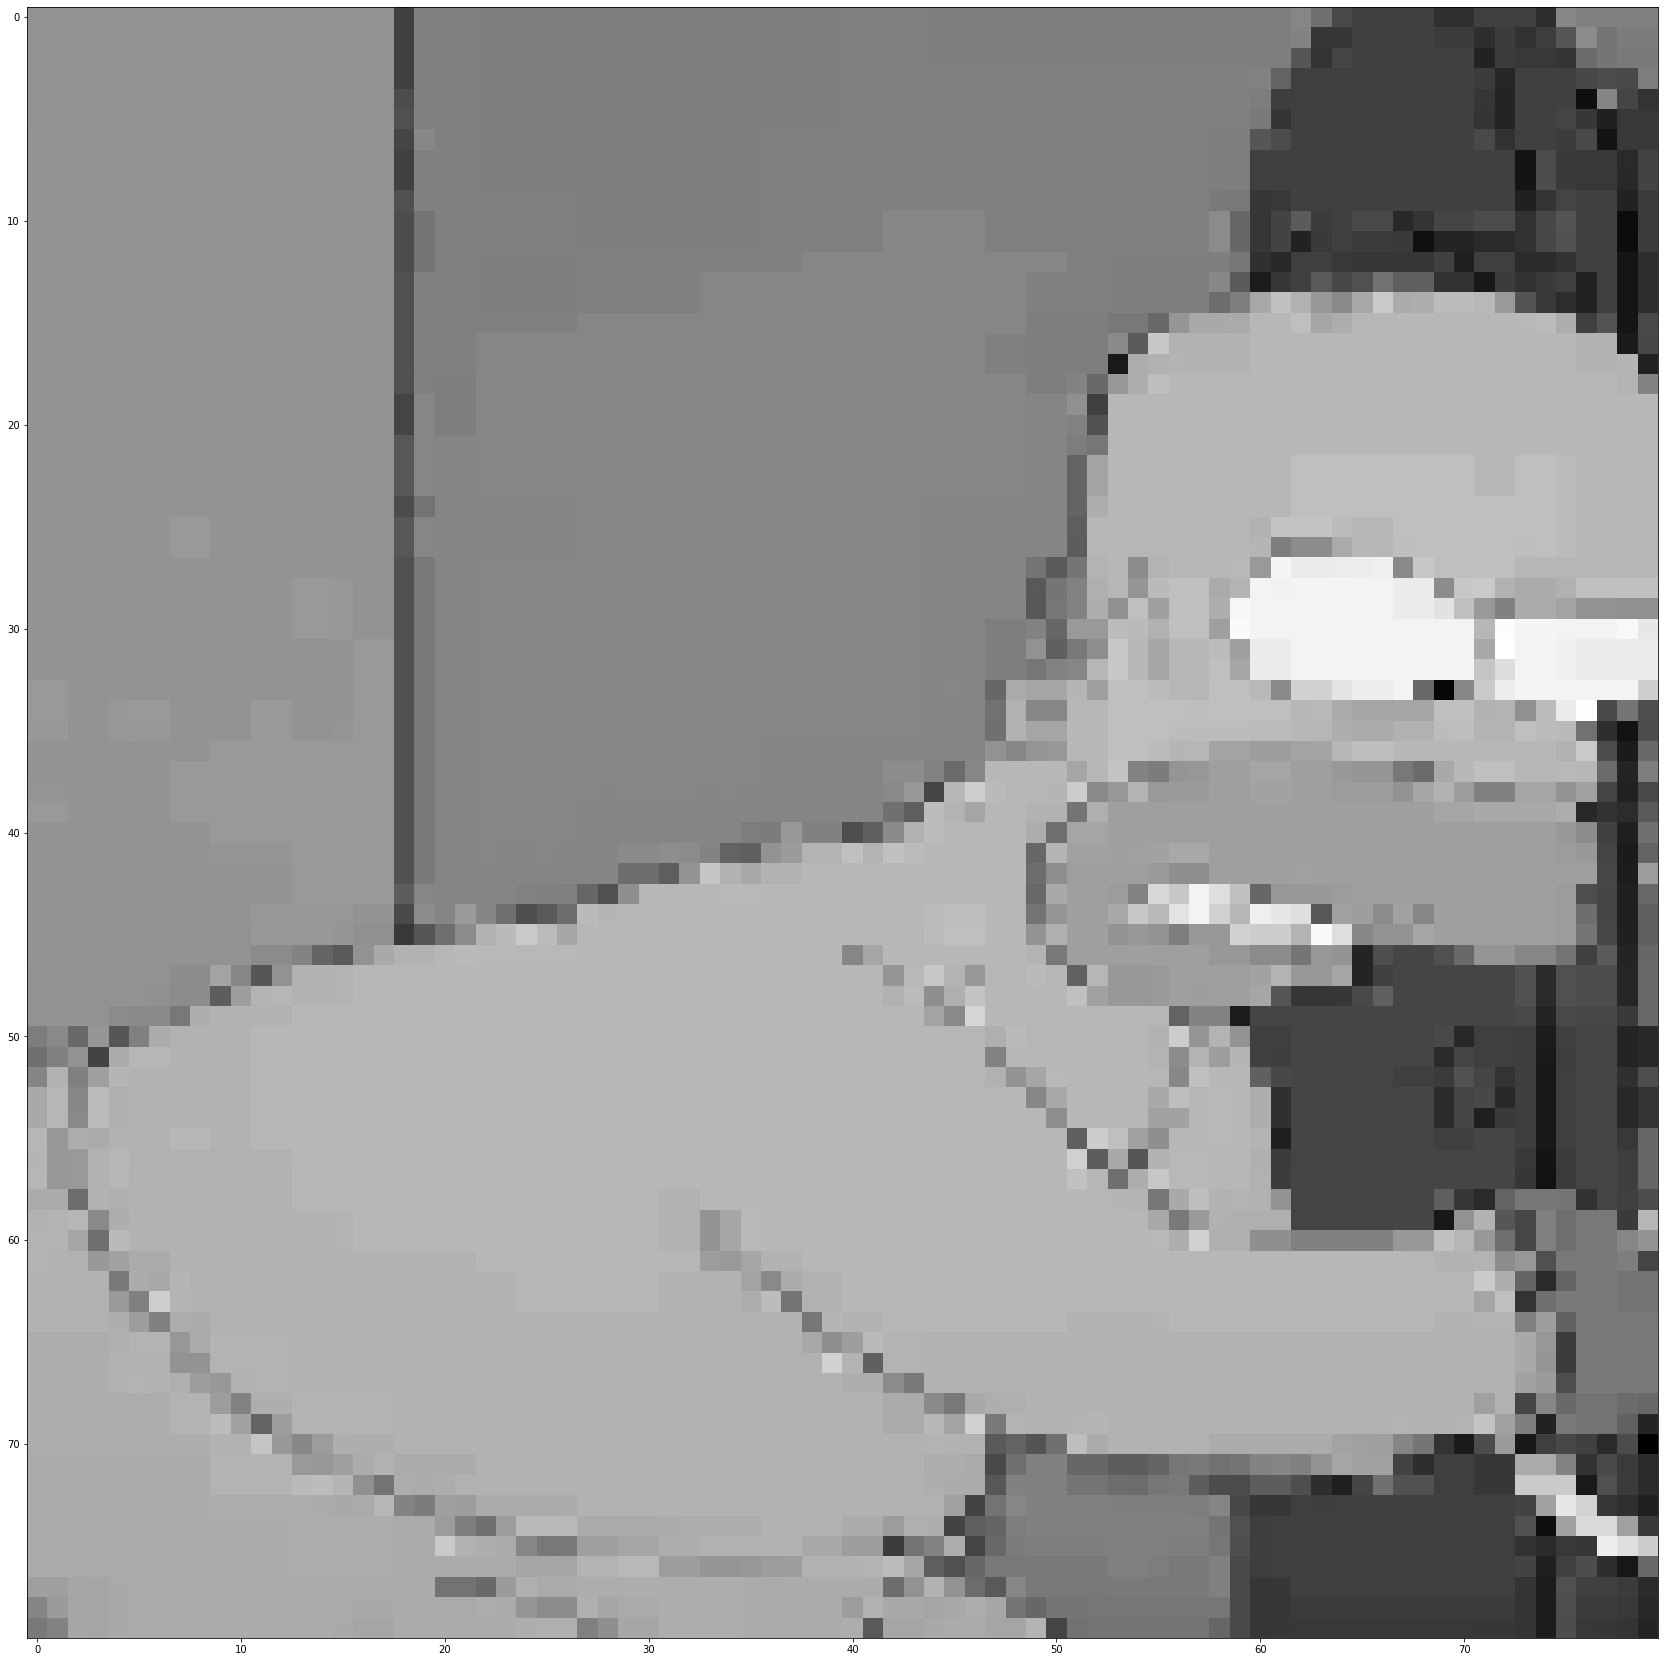

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0],cmap="gray")
plt.show()

In [13]:
featureSet,labels=caer.sep_train(train,IMG_SIZE=IMG_SIZE,)

In [14]:
from tensorflow.keras.utils import to_categorical
#Normalize the featureSet --> (0-1)
featureSet=caer.normalize(featureSet)
labels=to_categorical(labels,len(characters))

In [15]:
x_train,x_val,y_train,y_val=caer.train_val_split(featureSet,labels,val_ratio=.2)

In [16]:
del train
del featureSet
del labels

gc.collect()

23

In [36]:
#vriables for ining
BATCH_SIZE=32
EPOCHS=20


In [37]:
#Image data generator (introdeces randomness in network for better accuracy)
datagen=canaro.generators.imageDataGenerator()
train_gen=datagen.flow(x_train,y_train,batch_size=BATCH_SIZE)


In [38]:
#Create model (returns a compiled model)
model=canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE,channels=channels,output_dim=len(characters),
                                       loss="binary_crossentropy",decay=1e-7,learning_rate=0.001,momentum=0.9,nesterov=True)


In [39]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 18, 18, 64)       

In [40]:
#Training the model
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list=[LearningRateScheduler(canaro.lr_schedule)]
training=model.fit(train_gen,
                   steps_per_epoch=len(x_train)//BATCH_SIZE,
                   epochs=EPOCHS,
                   validation_data=(x_val,y_val),
                   validation_steps=len(y_val)//BATCH_SIZE,
                   callbacks=callbacks_list
                  )

Epoch 1/20
345/345 [==============================] - 10s 28ms/step - loss: 0.3409 - accuracy: 0.1586 - val_loss: 0.3312 - val_accuracy: 0.1552
Epoch 2/20
345/345 [==============================] - 9s 26ms/step - loss: 0.3235 - accuracy: 0.1608
Epoch 3/20
345/345 [==============================] - 9s 27ms/step - loss: 0.3233 - accuracy: 0.1640
Epoch 4/20
345/345 [==============================] - 9s 26ms/step - loss: 0.3228 - accuracy: 0.1635
Epoch 5/20
345/345 [==============================] - 9s 26ms/step - loss: 0.3197 - accuracy: 0.1728
Epoch 6/20
345/345 [==============================] - 9s 27ms/step - loss: 0.3088 - accuracy: 0.2214
Epoch 7/20
345/345 [==============================] - 9s 26ms/step - loss: 0.3037 - accuracy: 0.2520
Epoch 8/20
345/345 [==============================] - 9s 26ms/step - loss: 0.3016 - accuracy: 0.2594
Epoch 9/20
345/345 [==============================] - 10s 28ms/step - loss: 0.2987 - accuracy: 0.2715
Epoch 10/20
345/345 [==========================

In [41]:
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

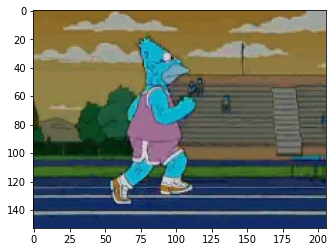

In [45]:
test_path=r"/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_1.jpg"
img= cv.imread(test_path)

plt.imshow(img,cmap="gray")
plt.show()

In [46]:
def prepare(image):
    image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    image=cv.resize(image,IMG_SIZE)
    image=caer.reshape(image,IMG_SIZE,1)
    return image

In [47]:
predictions=model.predict(prepare(img))

In [49]:
#getting class with the highest probability
print(characters[np.argmax(predictions[0])])

lisa_simpson
